# Import

## Library

In [5]:
import tensorflow as tf
import numpy as np
print("TensorFlow version:", tf.__version__)
from sklearn.model_selection import train_test_split


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Logistic Regression Clasificator
from sklearn.linear_model import LogisticRegression
# import warnings
# warnings.filterwarnings('ignore')

from PIL import Image
import numpy as np

from keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical


TensorFlow version: 2.12.0


In [6]:
print(sklearn.__version__)

NameError: name 'sklearn' is not defined

## Dataset

In [7]:
# Load and prepare the MNIST dataset
mnist = tf.keras.datasets.mnist
# Split dataset in data of Train and Data od Test
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_val, y_train, y_val  = train_test_split( x_train, y_train, test_size=0.166, random_state=4)
x_train,x_val, x_test = x_train / 255.0, x_val/ 255.0, x_test / 255.0

## Transform Dataset

In [8]:
x_train = x_train.reshape((-1, 28, 28, 1))
y_train = to_categorical(y_train, 10)

x_val = x_val.reshape((-1, 28, 28, 1))
y_val= to_categorical(y_val, 10)

In [9]:
print(f'x_train.shape : {x_train.shape}')
print(f'y_train.shape : {y_train.shape}\n')

# print(f'x_val.shape : {x_val.shape}')
# print(f'y_val.shape : {y_val.shape}\n')



x_train.shape : (50040, 28, 28, 1)
y_train.shape : (50040, 10)



# Model

In [5]:
# Definir la arquitectura de la CNN
def create_cnn_model():
    model = tf.keras.Sequential([
        # Capa de entrada
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1),kernel_regularizer=regularizers.l2(1e-5)),
        tf.keras.layers.Dropout(0.3),#regularización y reducir el sobreajuste del modelo
        
        # Capa de convolución 1
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(1e-5)),
        tf.keras.layers.Dropout(0.3),#regularización y reducir el sobreajuste del modelo
        
        # Capa de reducción de muestreo 1
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        # Capa de convolución 2
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(1e-5)),
        tf.keras.layers.Dropout(0.3),#regularización y reducir el sobreajuste del modelo
        
        # Capa de reducción de muestreo 2
        tf.keras.layers.MaxPooling2D((2, 2)),

        
        # Capa completamente conectada 1
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(1e-5)),
        tf.keras.layers.Dropout(0.3),#regularización y reducir el sobreajuste del modelo
        
        # Capa completamente conectada 2
        tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(1e-5)),
        tf.keras.layers.Dropout(0.3),#regularización y reducir el sobreajuste del modelo
        
        # Capa de salida
        tf.keras.layers.Dense(10, activation='softmax')  # num_classes representa el número de clases para la tarea de clasificación
    ])
    
    return model

# Crear una instancia del modelo
model = create_cnn_model()

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Imprimir un resumen de la arquitectura
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 dropout (Dropout)           (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                        

# Train and evaluate your model

In [6]:
n_epoch = 20

history = model.fit(x_train, 
                    y_train,  
                    epochs=n_epoch, 
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/20
1564/1564 [==============================] - 188s 119ms/step - loss: 0.2037 - accuracy: 0.9403 - val_loss: 0.0772 - val_accuracy: 0.9827
Epoch 2/20
1564/1564 [==============================] - 185s 118ms/step - loss: 0.0833 - accuracy: 0.9805 - val_loss: 0.0636 - val_accuracy: 0.9847
Epoch 3/20
1564/1564 [==============================] - 197s 126ms/step - loss: 0.0698 - accuracy: 0.9848 - val_loss: 0.0665 - val_accuracy: 0.9853
Epoch 4/20
1564/1564 [==============================] - 202s 129ms/step - loss: 0.0643 - accuracy: 0.9872 - val_loss: 0.0666 - val_accuracy: 0.9873
Epoch 5/20
1564/1564 [==============================] - 204s 131ms/step - loss: 0.0621 - accuracy: 0.9884 - val_loss: 0.0602 - val_accuracy: 0.9885
Epoch 6/20
1564/1564 [==============================] - 188s 120ms/step - loss: 0.0622 - accuracy: 0.9891 - val_loss: 0.0616 - val_accuracy: 0.9893
Epoch 7/20
1564/1564 [==============================] - 176s 113ms/step - loss: 0.0597 - accuracy: 0.9903 - val_

# Grafics

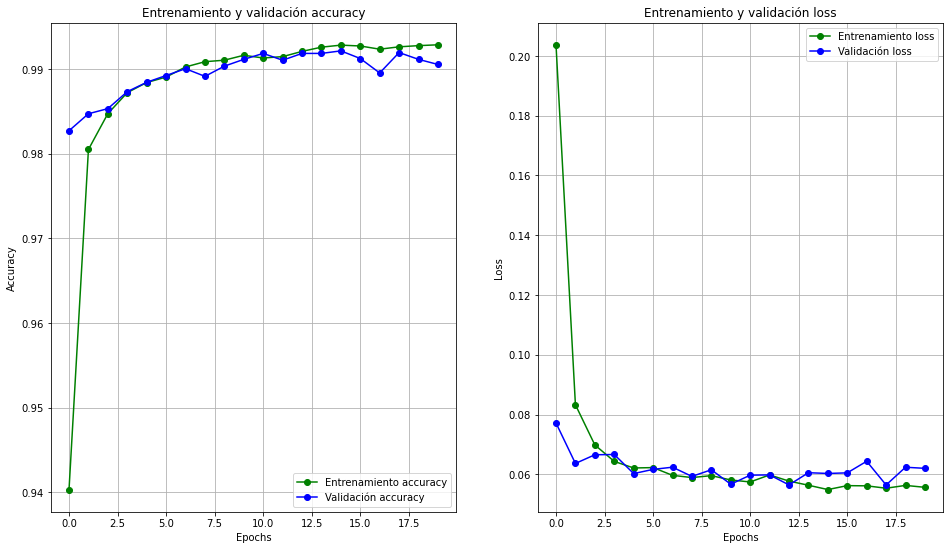

In [7]:
def visualizacion_resultados(n,history):
    epochs = [i for i in range( n  )]
    fig, ax = plt.subplots(1,2)
    train_acc = history.history["accuracy"]
    train_loss = history.history["loss"]
    val_acc = history.history["val_accuracy"]
    val_loss = history.history["val_loss"]
    fig.set_size_inches(16,9)

    ax[0].plot(epochs, train_acc, "go-",label = "Entrenamiento accuracy")
    ax[0].plot(epochs, val_acc, "bo-",label = "Validación accuracy")
    ax[0].set_title("Entrenamiento y validación accuracy")
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    ax[0].grid()

    ax[1].plot(epochs, train_loss, "go-",label = "Entrenamiento loss")
    ax[1].plot(epochs, val_loss, "bo-",label = "Validación loss")
    ax[1].set_title("Entrenamiento y validación loss")
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")
    ax[1].grid()
    

    plt.show() 
visualizacion_resultados(n_epoch,history)